# Import all the libraries

Basic

In [1]:
import numpy as np      #Arrays purpose 
import pandas as pd     #Data analysis and manipulation
import re               #Regular expression

Visualization

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  #Visualization

Train Test split for training and testing of data

In [3]:
from sklearn.model_selection import train_test_split #Train and Test data

Mathematics and Algorithms

In [4]:
#function to get a mode of a dataset
from statistics import mode

#normalizing dataset
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


#For resampling process to change the ratio of imbalanced ratio of the classes testing various ratios
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#resampling
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique

# Importing All the CSV files

In [5]:
train = pd.read_csv('train.csv')
campaign = pd.read_csv('campaign_data.csv')
coupon = pd.read_csv('coupon_item_mapping.csv')
demograph = pd.read_csv('customer_demographics.csv')
transaction = pd.read_csv('customer_transaction_data.csv')
item = pd.read_csv('item_data.csv')
test = pd.read_csv('test.csv')

Making the dictionary to save all the data "To update data and save them easily, a dictionary is created."

In [6]:
tables_data = {}
tables_data['train'] = train
tables_data['campaign'] = campaign
tables_data['coupon'] = coupon 
tables_data['demograph'] = demograph
tables_data['transaction'] = transaction 
tables_data['item'] = item

# Data Analysis

Train data

In [7]:
train.head(11) #Gives the first 10 values of data

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
5,11,11,795,793,0
6,14,9,444,590,0
7,15,29,538,368,0
8,17,30,857,523,0
9,19,2,559,679,0


In [8]:
train.info() #Gives the information about train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [9]:
len(train.campaign_id.unique()) #collect all the id and give exect number and length

18

In [10]:
D=train.redemption_status.value_counts() #Gives the count of 0's and 1's

In [11]:
D

0    77640
1      729
Name: redemption_status, dtype: int64

Text(0.5, 0, 'class')

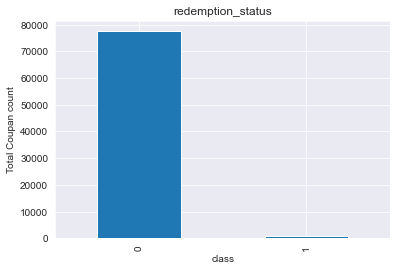

In [12]:
D.plot.bar()  #Graph
plt.title('redemption_status')
plt.ylabel('Total Coupan count')
plt.xlabel('class')

In [13]:
729/(78369)*100  #Getting Percentage of Redemption_status

0.930214753282548

We get 0.93% of coupan redemption_status

As we can see that data is havily tipped to one side we have to use either OVER or UNDER sampling

if we have to make class 0 data as class 1 to fit the orignal data we use (Under Sampling)
if we have to make class 1 data as class 0 to fit the orignal data we use (Over Sampling)

Let us see each campaign have unique set of coupons or do coupons overlap in different campaigns

In [14]:
coupon_use = {}
for coupons in train.coupon_id.unique():
    camp =  len(train[train.coupon_id==coupons].campaign_id.unique())  #camp = number of camp use the coupon
    if camp in coupon_use.keys():        #collect coupon ids that were used camp times
         coupon_use[camp].append(coupons)
    else:
         coupon_use[camp] = [coupons]

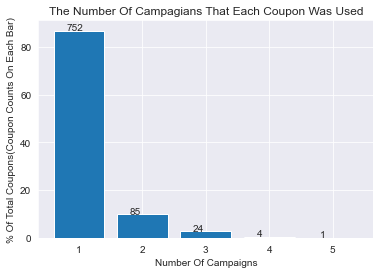

In [15]:
coupon_freq = {}  #coupon_frequency

for camp in coupon_use.keys():
    coupon_freq[camp]= len(coupon_use[camp])/len(train.coupon_id.unique())*100

plt.bar(coupon_freq.keys(),coupon_freq.values())

# Text on the top of each barplot
label = [len(x) for x in coupon_use.values()]
x_loc = np.array([x for x in coupon_freq.keys()])-0.2
y_loc = np.array([x for x in coupon_freq.values()]) + 0.1
for i in range(5):
    plt.text(x = x_loc[i] , y = y_loc[i], s = label[i], size = 10)
plt.title('The number of campagians that each coupon was used'.title())
plt.ylabel('% of total coupons(coupon counts on each bar)'.title())
plt.xlabel('number of campaigns'.title())
plt.show()

Campaign Data    

In [16]:
campaign.head(11) #Gives the first 10 values of data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [17]:
campaign.info() #Gives information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [18]:
len(campaign.campaign_id.unique()) #Gives all unoque values

28

There are 28 campaign

In [19]:
D = campaign.campaign_type.value_counts() #it counts X and Y values
D

Y    22
X     6
Name: campaign_type, dtype: int64

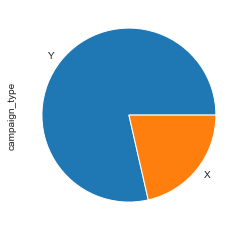

In [20]:
D.plot.pie() #graph

Coupan Data

In [21]:
coupon.head(11)  #Gives the first 10 values of data

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
5,520,77
6,529,77
7,524,77
8,522,81
9,518,81


In [22]:
coupon.info() #it gives information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [23]:
coupon.coupon_id.value_counts().sort_values() 
#it count all coupan id and make it unique and count number in ascending

53          1
929         1
54          1
1013        1
1086        1
        ...  
33       4394
31       4873
22       4947
23      11813
32      11814
Name: coupon_id, Length: 1116, dtype: int64

In [24]:
len(coupon.item_id.unique()) # find length of item_id

36289

In [25]:
len(coupon.coupon_id.unique()) # find length of coupon_id

1116

As we can see there are coupan that are used by multiple items.

Customer Demographics

In [26]:
demograph.head(11)  #Gives the first 10 values of data

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


In [27]:
demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [28]:
demograph.family_size.value_counts().sort_values() #count the size of family

4      48
5+     57
3     104
1     248
2     303
Name: family_size, dtype: int64

In [29]:
demograph.marital_status.value_counts() #count number of married and single customer

Married    317
Single     114
Name: marital_status, dtype: int64

In [30]:
demograph.no_of_children.value_counts() #count the number of children 

1     107
3+     60
2      55
Name: no_of_children, dtype: int64

Customer Transaction Data

In [31]:
transaction.head(11)  #Gives the first 10 values of data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
5,2012-01-02,1501,57397,1,71.24,-28.14,0.0
6,2012-01-02,857,12424,1,106.50,-14.25,0.0
7,2012-01-02,857,14930,1,110.07,0.00,0.0
8,2012-01-02,857,16657,1,89.05,-35.26,0.0
9,2012-01-02,67,10537,3,32.06,0.00,0.0


In [32]:
transaction.info() #gives the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [33]:
transaction.customer_id.value_counts().sort_values() #count customer_id same number 

1326      79
907       80
406       83
1180      83
1150      87
        ... 
1011    3862
1475    3945
464     4134
711     4173
1555    4522
Name: customer_id, Length: 1582, dtype: int64

In [34]:
transaction.quantity.value_counts().sort_values() # count the quantity of transection

6425           1
8303           1
17507          1
7272           1
22471          1
          ...   
5           5382
4          18745
3          33094
2         188907
1        1054059
Name: quantity, Length: 9252, dtype: int64

In [35]:
len(transaction[transaction.coupon_discount<0]) # gives the discount number 

21286

In [36]:
21286/1324566*100 #percentage

1.607016939888235

There are 1.6% of transactions that received coupon discounts.

In [37]:
transaction.coupon_discount.unique()

array([    0.  ,   -35.62,   -14.25,   -26.71,   -21.02,   -19.59,
         -80.14,   -17.81,    -8.9 ,  -102.94,   -71.24,   -21.37,
         -10.69,   -12.47,  -178.1 ,  -106.86,   -53.43,   -35.26,
         -12.11,  -213.72,   -56.64,   -28.14,   -44.52,  -569.92,
         -53.07,   -62.33,   -49.87,   -37.4 ,   -24.93,   -32.06,
        -213.36,  -355.84,  -142.12,   -17.45,   -39.18,   -40.96,
        -142.48,  -109.71,    -7.12,   -88.69,  -427.44,   -45.95,
         -89.05,   -16.03,  -113.63,  -106.5 ,   -70.53,   -31.35,
         -58.77,  -117.55,   -60.2 ,   -78.36,  -128.23,   -23.51,
         -79.79,   -28.5 ,   -92.26,  -177.74,   -47.73,  -554.96,
         -27.07,    -5.34,  -498.32,   -90.83,  -108.64,   -95.11,
        -319.87,   -30.28,  -284.6 ,   -70.88,  -124.67,  -152.81,
         -60.55,  -356.2 ,   -91.9 ,  -512.57,  -113.27,  -184.16,
        -117.19,  -160.29,  -184.87,  -249.34,   -55.21,   -95.82,
         -42.74,  -195.55,   -97.96,   -94.39,   -23.15,   -27

In [38]:
transaction.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,1324566.0,804.001972,457.336313,1.00,418.00,801.00,1198.00,1582.00
item_id,1324566.0,29519.030160,17908.064406,1.00,14684.00,26597.00,42405.75,74066.00
quantity,1324566.0,130.663340,1311.545447,1.00,1.00,1.00,1.00,89638.00
selling_price,1324566.0,114.603633,152.905303,0.36,49.16,78.01,124.31,17809.64
other_discount,1324566.0,-17.768707,37.888674,-3120.31,-23.15,-1.78,0.00,0.00
coupon_discount,1324566.0,-0.594898,7.069367,-1992.23,0.00,0.00,0.00,0.00


Item data

In [39]:
item.head(11)   #gives the first 10 data of item

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
5,6,56,Local,Grocery
6,7,56,Local,Pharmaceutical
7,8,56,Local,Bakery
8,9,11,Local,Grocery
9,10,56,Local,Grocery


In [40]:
item.info() #gives the information of item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [41]:
D = item.category.value_counts() #Count the number of category
D

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

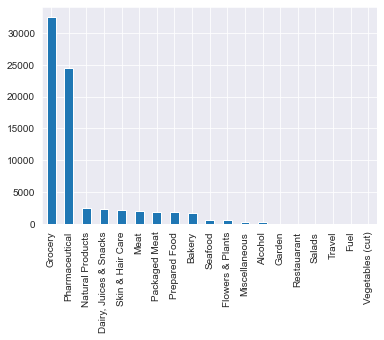

In [42]:
D.plot.bar()

In [43]:
item.brand_type.value_counts()  #count the number of brand

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [44]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


# Data Preparation

Now we can Start with Merging the Data Frames As all the Dataframes have data in the proper format and find the missing values and formet it

Finding Missing values

1) For train Data

In [45]:
for i in range(len(train.columns)):
    print(train.columns[i],'\n')
    print(train[train.columns[i]].unique(),'\n')


id 

[     1      2      6 ... 128590 128592 128595] 

campaign_id 

[13  9  8 11 29 30  2  5 12 26  3  4 10  7 28 27  6  1] 

coupon_id 

[  27  116  635  644 1017  795  444  538  857  559  575 1028  705  517
  893  796  506  689  268    8  674  320  109  278 1031  326  363  911
  383  482  813  118  663  332  500  757 1067   87  905 1114  152   57
  271  413  582  333  485  256  980  700  628  136  750  854  761  828
  881  129  867  709  169 1083  530  822  126  917   22  960   24  772
  603  982  510  132   60 1063  166  679  839  459  658  106  168  473
  627  145    7  667  924  621  467  985  171 1056  890  920  279  948
  368  107   19  800  420  756  783  687  913  725  483  275  788  170
   14  416   54  113  125  902  526  144  554  936  971  872  873  643
  433  131  591  608  723   76  696  544  148   97  819  673  123  490
   55  989   83  437  836  806  891  870  542   64  646  566  520  910
  581  537  656  996 1012  759 1044  616  883  754  430  786  694  119
  481  94

2) For campaign data

In [46]:
for i in range(len(campaign.columns)):
    print(campaign.columns[i],'\n')
    print(campaign[campaign.columns[i]].unique(),'\n')


campaign_id 

[24 25 20 23 21 22 18 19 17 16 13 11 12 10  9  8  7  6  3  5  4  1  2 30
 29 28 27 26] 

campaign_type 

['Y' 'X'] 

start_date 

['21/10/13' '07/09/13' '08/10/13' '16/09/13' '10/08/13' '26/08/13'
 '29/07/13' '15/07/13' '19/05/13' '22/04/13' '08/04/13' '11/03/13'
 '16/02/13' '02/02/13' '28/01/13' '22/12/12' '12/01/13' '07/01/13'
 '12/12/12' '17/12/12' '19/11/12' '08/10/12' '16/09/12' '25/08/12'
 '12/08/12'] 

end_date 

['20/12/13' '22/11/13' '16/11/13' '15/11/13' '18/10/13' '04/10/13'
 '27/09/13' '30/08/13' '16/08/13' '05/07/13' '07/06/13' '24/05/13'
 '10/05/13' '12/04/13' '05/04/13' '08/03/13' '01/03/13' '16/02/13'
 '15/02/13' '08/02/13' '18/01/13' '04/01/13' '30/11/12' '16/11/12'
 '27/10/12' '21/09/12'] 



3) For Coupon data

In [47]:
for i in range(len(coupon.columns)):
    print(coupon.columns[i],'\n')
    print(coupon[coupon.columns[i]].unique(),'\n')


coupon_id 

[105 107 494 ... 217 218 219] 

item_id 

[   37    75    76 ... 71965 67815 68920] 



4) For item data

In [48]:
for i in range(len(item.columns)):
    print(item.columns[i],'\n')
    print(item[item.columns[i]].unique(),'\n')

item_id 

[    1     2     3 ... 74064 74065 74066] 

brand 

[   1   56   11 ... 5463 2997 3360] 

brand_type 

['Established' 'Local'] 

category 

['Grocery' 'Miscellaneous' 'Bakery' 'Pharmaceutical' 'Packaged Meat'
 'Seafood' 'Natural Products' 'Dairy, Juices & Snacks' 'Prepared Food'
 'Skin & Hair Care' 'Meat' 'Travel' 'Flowers & Plants' 'Fuel' 'Salads'
 'Alcohol' 'Garden' 'Restauarant' 'Vegetables (cut)'] 



5) For demograph data

In [49]:
for i in range(len(demograph.columns)):
    print(demograph.columns[i],'\n')
    print(demograph[demograph.columns[i]].unique(),'\n')

customer_id 

[   1    6    7    8   10   11   12   13   14   15   17   19   22   27
   28   30   31   33   35   36   38   39   40   41   42   45   48   51
   52   53   55   58   59   66   67   69   71   72   74   75   78   79
   82   83   84   85   87   89   90   92   93   94   97  103  105  107
  108  110  112  113  114  119  123  124  128  131  132  134  135  136
  138  140  141  142  143  144  149  150  151  153  154  155  158  159
  161  162  163  167  168  174  178  179  180  185  186  189  191  192
  193  195  197  201  202  204  205  207  209  212  214  223  225  226
  227  228  230  231  232  235  238  239  242  243  245  246  248  249
  250  251  252  253  259  262  265  266  267  268  269  271  276  277
  279  281  283  284  286  287  288  292  293  294  295  297  298  300
  303  306  313  314  315  316  317  318  319  320  327  329  333  336
  338  339  343  347  348  349  352  353  355  357  361  363  367  368
  369  371  374  375  377  378  381  382  383  384  386  389  3

6) For Transection data

In [50]:
for i in range(len(transaction.columns)):
    print(transaction.columns[i],'\n')
    print(transaction[transaction.columns[i]].unique(),'\n')

date 

['2012-01-02' '2012-01-03' '2012-01-04' '2012-01-05' '2012-01-06'
 '2012-01-07' '2012-01-08' '2012-01-09' '2012-01-10' '2012-01-11'
 '2012-01-12' '2012-01-13' '2012-01-14' '2012-01-15' '2012-01-16'
 '2012-01-17' '2012-01-18' '2012-01-19' '2012-01-20' '2012-01-21'
 '2012-01-22' '2012-01-23' '2012-01-24' '2012-01-25' '2012-01-26'
 '2012-01-27' '2012-01-28' '2012-01-29' '2012-01-30' '2012-01-31'
 '2012-02-01' '2012-02-02' '2012-02-03' '2012-02-04' '2012-02-05'
 '2012-02-06' '2012-02-07' '2012-02-08' '2012-02-09' '2012-02-10'
 '2012-02-11' '2012-02-12' '2012-02-13' '2012-02-14' '2012-02-15'
 '2012-02-16' '2012-02-17' '2012-02-18' '2012-02-19' '2012-02-20'
 '2012-02-21' '2012-02-22' '2012-02-23' '2012-02-24' '2012-02-25'
 '2012-02-26' '2012-02-27' '2012-02-28' '2012-02-29' '2012-03-01'
 '2012-03-02' '2012-03-03' '2012-03-04' '2012-03-05' '2012-03-06'
 '2012-03-07' '2012-03-08' '2012-03-09' '2012-03-10' '2012-03-11'
 '2012-03-12' '2012-03-13' '2012-03-14' '2012-03-15' '2012-03-16'
 '2

Sometimes, missing data values are filled with values that do not make sense as place holders instead of NaN. For example, we can check if there are positive value for discounts in transactions.

In [51]:
transaction.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')

In [52]:
any(transaction.coupon_discount>0)

False

In [53]:
any(transaction.other_discount>0)

False

In [54]:
any(transaction.selling_price<0)

False

Hear we can see all are false if true come then we can say that there is missing values

After careful examinations, only table that we need to work on missing values is demograph.This we will do after Marging the Tabels so we dont have to do again.

# Checking data type

In [55]:
transaction.dtypes 

date                object
customer_id          int64
item_id              int64
quantity             int64
selling_price      float64
other_discount     float64
coupon_discount    float64
dtype: object

In [56]:
train.dtypes

id                   int64
campaign_id          int64
coupon_id            int64
customer_id          int64
redemption_status    int64
dtype: object

In [57]:
campaign.dtypes

campaign_id       int64
campaign_type    object
start_date       object
end_date         object
dtype: object

In [58]:
coupon.dtypes 

coupon_id    int64
item_id      int64
dtype: object

In [59]:
demograph.dtypes 

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [60]:
item.dtypes 

item_id        int64
brand          int64
brand_type    object
category      object
dtype: object

We only need to change campaign,demograph,transection and items column

In [61]:
#Converting the date column into date time
#Reset the index of the DataFrame, and use the default one instead.
transaction['date'] = pd.to_datetime(transaction['date'])
transaction = transaction.sort_values('date').reset_index(drop=True)

In [62]:
#Creating 3 new columns from the date column
transaction['day'] = transaction["date"].apply(lambda x: x.day)
transaction['dow'] = transaction["date"].apply(lambda x: x.weekday())
transaction['month'] = transaction["date"].apply(lambda x: x.month)
transaction['year_date']=transaction['date'].apply(lambda x: x.year)


In [63]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,dow,month,year_date
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,0,1,2012
1,2012-01-02,464,20697,1,92.26,-21.37,-35.62,2,0,1,2012
2,2012-01-02,464,20717,2,28.50,-27.78,0.00,2,0,1,2012
3,2012-01-02,464,21008,1,35.26,-17.81,0.00,2,0,1,2012
4,2012-01-02,464,22243,2,118.97,-22.80,0.00,2,0,1,2012


Campaign

In [64]:
#if we want a exect number of how much time camp was there we need to change datatype first
campaign['start_date'] = pd.to_datetime(campaign['start_date'], format = '%d/%m/%y')
campaign['end_date'] = pd.to_datetime(campaign['end_date'], format = '%d/%m/%y')

In [65]:
#Creating a new column campaign_duration
campaign["campaign_duration"] = campaign["end_date"] - campaign["start_date"]
campaign["campaign_duration"] = campaign["campaign_duration"].apply(lambda x: x.days) 

In [66]:
campaign.dtypes

campaign_id                   int64
campaign_type                object
start_date           datetime64[ns]
end_date             datetime64[ns]
campaign_duration             int64
dtype: object

In [67]:
campaign.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [68]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date,campaign_duration
0,24,Y,2013-10-21,2013-12-20,60
1,25,Y,2013-10-21,2013-11-22,32
2,20,Y,2013-09-07,2013-11-16,70
3,23,Y,2013-10-08,2013-11-15,38
4,21,Y,2013-09-16,2013-10-18,32


In [69]:
train.campaign_id.unique() #we can see 18 camp id in training of data

array([13,  9,  8, 11, 29, 30,  2,  5, 12, 26,  3,  4, 10,  7, 28, 27,  6,
        1])

In [70]:
test.campaign_id.unique() # we want 10 prediction as we can see on test data

array([22, 20, 25, 17, 18, 21, 23, 19, 16, 24])

In [71]:
tables_data['campaign'] = campaign #Making the change to Tables dic

Demograph

In [72]:
demograph.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [73]:
demograph.head(16)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


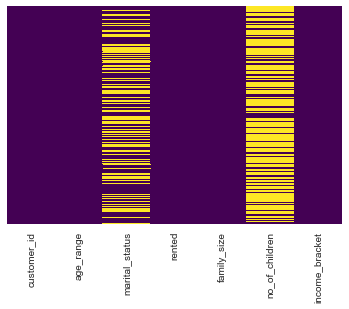

In [74]:
sns.heatmap(demograph.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
demograph.no_of_children.value_counts()

1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [76]:
demograph.age_range.value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

Transaction

In [77]:
#Inserting a new column to know if the coupon was used or not
transaction['coupon_used'] = transaction.coupon_discount.apply(lambda x: 1 if x !=0 else 0)
transaction['count']=1

In [78]:
#Converting the date column into date time
#Reset the index of the DataFrame, and use the default one instead.
#If the DataFrame has a MultiIndex, this method can remove one or more levels.
transaction['date'] = pd.to_datetime(transaction['date'])
transaction= transaction.sort_values('date').reset_index(drop=True)

In [79]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,dow,month,year_date,coupon_used,count
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,0,1,2012,0,1
1,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,0,1,2012,0,1
2,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,0,1,2012,0,1
3,2012-01-02,1501,57397,1,71.24,-28.14,0.0,2,0,1,2012,0,1
4,2012-01-02,857,12424,1,106.50,-14.25,0.0,2,0,1,2012,0,1


In [80]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


Items

In [81]:
#Label Encoding the brand_type and category columns

item.brand_type = encoder.fit_transform(item["brand_type"])
item.category = encoder.fit_transform(item["category"])

In [82]:
item.brand_type.value_counts()

0    62842
1    11224
Name: brand_type, dtype: int64

In [83]:
item.category.value_counts().sort_values()

18        7
4        14
17       19
14       40
13       78
5       102
0       303
8       385
3       664
15      728
1      1679
12     1880
10     1966
7      2080
16     2244
2      2425
9      2533
11    24471
6     32448
Name: category, dtype: int64

In [84]:
item.head()

,item_id,brand,brand_type,category
0,1,1,0,6
1,2,1,0,8
2,3,56,1,1
3,4,56,1,6
4,5,56,1,6


In [85]:
campaign.dtypes

campaign_id                   int64
campaign_type                object
start_date           datetime64[ns]
end_date             datetime64[ns]
campaign_duration             int64
dtype: object

In [86]:
item.dtypes

item_id       int64
brand         int64
brand_type    int64
category      int64
dtype: object

In [87]:
coupon.dtypes

coupon_id    int64
item_id      int64
dtype: object

In [88]:
transaction.dtypes

date               datetime64[ns]
customer_id                 int64
item_id                     int64
quantity                    int64
selling_price             float64
other_discount            float64
coupon_discount           float64
day                         int64
dow                         int64
month                       int64
year_date                   int64
coupon_used                 int64
count                       int64
dtype: object

In [89]:
demograph.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

# Aggregating and Concat of tables

Let us see schema before proceeding

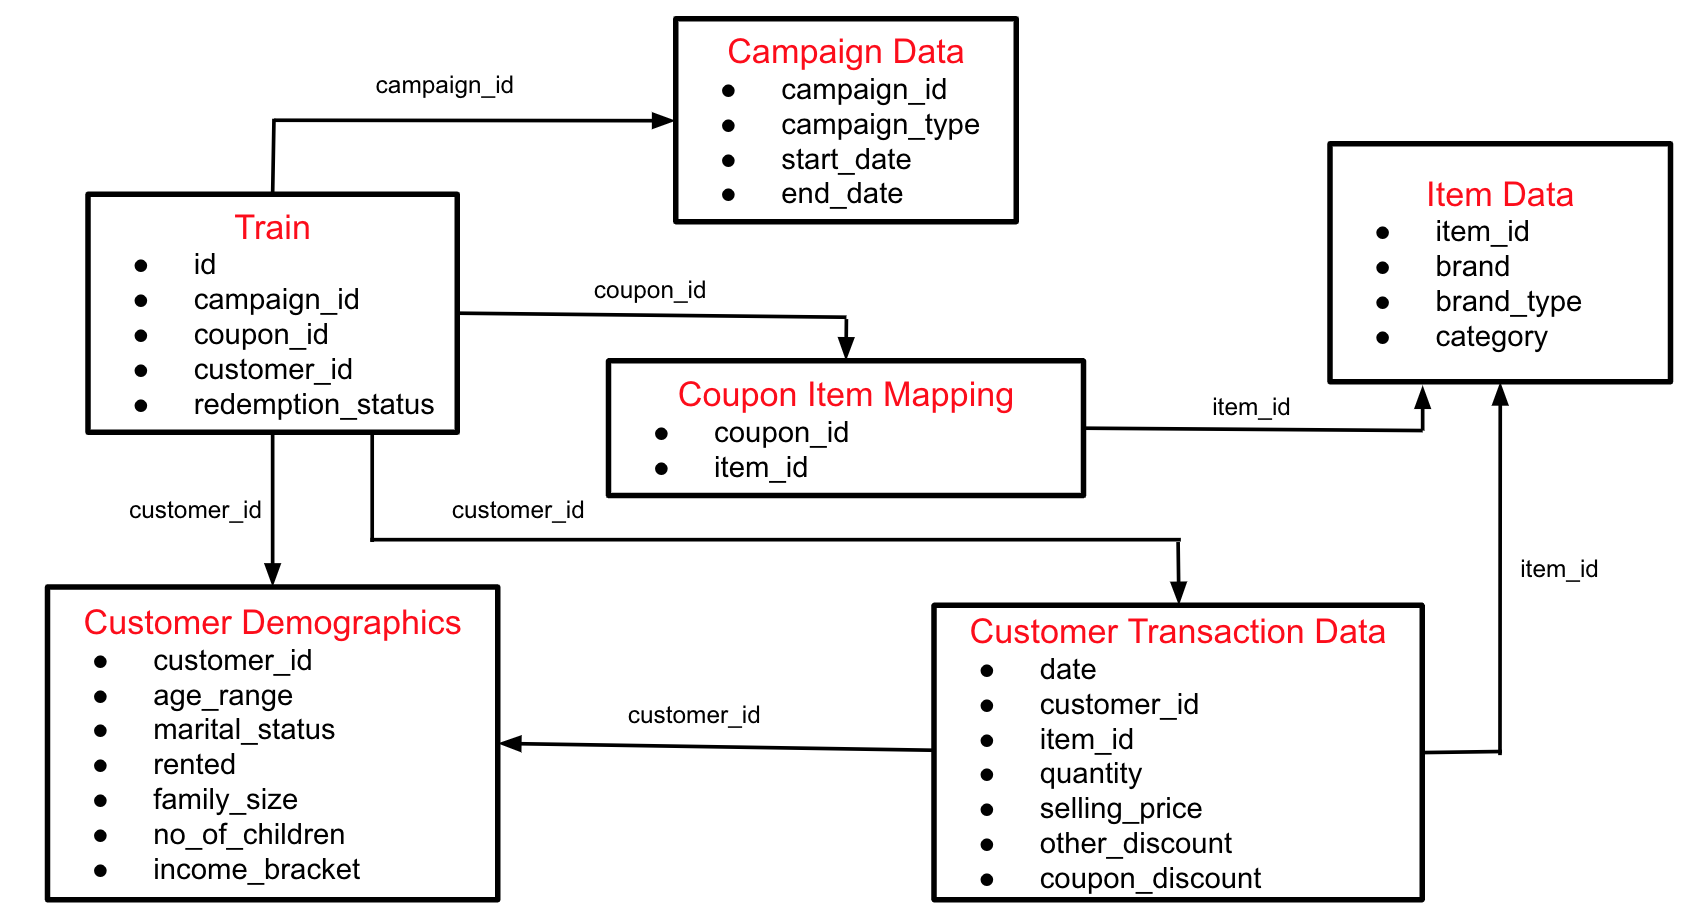



aggregating transactions by item_id as a table transaction1

In [90]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,dow,month,year_date,coupon_used,count
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,0,1,2012,0,1
1,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,0,1,2012,0,1
2,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,0,1,2012,0,1
3,2012-01-02,1501,57397,1,71.24,-28.14,0.0,2,0,1,2012,0,1
4,2012-01-02,857,12424,1,106.50,-14.25,0.0,2,0,1,2012,0,1


Using `pandas.pivot_table`, transaction data on each item is aggregated. The aggregated Dataframe has 7 columns and each column is described as followed.

|name|Description|
|:---|:---|
| cust_no| number of distinct customers that bought the item|
| avg_order_qnt  |average order quantity|
| avg_price| average selling price|
| avg_oth_dis | average amount of other discount|
|avg_cp_dis| average amount of coupon discount|
|ct_ord| number of orders made|
|sum_cp_used| number of coupon used|

In [91]:
transaction1 = pd.pivot_table(transaction, index = 'item_id',
               values = ['customer_id','quantity','selling_price',
                         'other_discount','coupon_discount','count','coupon_used'],
               aggfunc={'customer_id':lambda x:len(set(x)),
                        'quantity':np.mean,  
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'count':sum,
                        'coupon_used':sum
                       }
              ) # we have use the aggrigate function mean to find average


In [92]:
new_cols = {'customer_id':'cust_no',
            'quantity':'avg_order_qnt',
            'selling_price':'avg_price',
            'other_discount':'avg_oth_dis',
            'coupon_discount':'avg_cp_dis',
            'count':'ct_ord',
           'coupon_used':'sum_cp_used'}
transaction1.rename(columns=new_cols, inplace = True) # we have make new dic new_cols and add 

In [93]:
transaction1.head()

,ct_ord,avg_cp_dis,sum_cp_used,cust_no,avg_oth_dis,avg_order_qnt,avg_price
item_id,,,,,,,
1,2,0.0,0,2,0.0,1.0,124.31
2,1,0.0,0,1,0.0,1.0,35.26
3,1,0.0,0,1,0.0,1.0,56.64
4,1,0.0,0,1,0.0,1.0,54.85
5,1,0.0,0,1,0.0,1.0,81.57


In [94]:
transaction1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74063 entries, 1 to 74066
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ct_ord         74063 non-null  int64  
 1   avg_cp_dis     74063 non-null  float64
 2   sum_cp_used    74063 non-null  int64  
 3   cust_no        74063 non-null  int64  
 4   avg_oth_dis    74063 non-null  float64
 5   avg_order_qnt  74063 non-null  float64
 6   avg_price      74063 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 4.5 MB


|name|Description|
|:---|:---|
|sum_cp_dis|total amount of discount by coupons per item|
|sum_oth_dis| total amount of discount by other sources per item|
|sum_order_qnt|total amount of ordered quantity per item|
|sum_total_dis|total amount of discount by any sources per item|
|avg_total_dis|average amount of discount by any sources per item|

In [95]:
transaction1['sum_cp_dis']=transaction1['avg_cp_dis']*transaction1['ct_ord']
#gives the total amount of discount by coupons per item

In [96]:
transaction1['sum_oth_dis'] = transaction1['avg_oth_dis']*transaction1['ct_ord']
#total amount of discount by other sources per item

In [97]:
transaction1['sum_order_qnt']= transaction1['avg_order_qnt']*transaction1['ct_ord']
#total amount of ordered quantity per item

In [98]:
transaction1['sum_order_qnt'].unique()

array([  2.,   1.,   3., ..., 731., 788.,  80.])

In [99]:
transaction1['sum_total_dis'] = transaction1['sum_cp_dis'] +transaction1['sum_oth_dis']
#total amount of discount by any sources per item

In [100]:
transaction1['avg_total_dis'] = transaction1['avg_cp_dis'] +transaction1['avg_oth_dis']
#average amount of discount by any sources per item

In [101]:
transaction1.head()

,ct_ord,avg_cp_dis,sum_cp_used,cust_no,avg_oth_dis,avg_order_qnt,avg_price,sum_cp_dis,sum_oth_dis,sum_order_qnt,sum_total_dis,avg_total_dis
item_id,,,,,,,,,,,,
1,2,0.0,0,2,0.0,1.0,124.31,0.0,0.0,2.0,0.0,0.0
2,1,0.0,0,1,0.0,1.0,35.26,0.0,0.0,1.0,0.0,0.0
3,1,0.0,0,1,0.0,1.0,56.64,0.0,0.0,1.0,0.0,0.0
4,1,0.0,0,1,0.0,1.0,54.85,0.0,0.0,1.0,0.0,0.0
5,1,0.0,0,1,0.0,1.0,81.57,0.0,0.0,1.0,0.0,0.0


In [102]:
tables_data['transaction1']=transaction1
#Save t1

Merge the aggregated transaction table on items (transaction1) with item table as trans_item¶

In [103]:
trans_item = pd.merge(transaction1, item, on = 'item_id', how ='left') 
#Mearge item table with transection1 as trans_item

In [104]:
trans_item.head()

,item_id,ct_ord,avg_cp_dis,sum_cp_used,cust_no,avg_oth_dis,avg_order_qnt,avg_price,sum_cp_dis,sum_oth_dis,sum_order_qnt,sum_total_dis,avg_total_dis,brand,brand_type,category
0,1,2,0.0,0,2,0.0,1.0,124.31,0.0,0.0,2.0,0.0,0.0,1,0,6
1,2,1,0.0,0,1,0.0,1.0,35.26,0.0,0.0,1.0,0.0,0.0,1,0,8
2,3,1,0.0,0,1,0.0,1.0,56.64,0.0,0.0,1.0,0.0,0.0,56,1,1
3,4,1,0.0,0,1,0.0,1.0,54.85,0.0,0.0,1.0,0.0,0.0,56,1,6
4,5,1,0.0,0,1,0.0,1.0,81.57,0.0,0.0,1.0,0.0,0.0,56,1,6


Merge coupon with trans_item as cp_trans_item

In [105]:
cp_trans_item = pd.merge(coupon, trans_item, on= 'item_id', how = 'left')
#Mearge tran_table with coupon as cp_trans_items

In [106]:
cp_trans_item.head()

,coupon_id,item_id,ct_ord,avg_cp_dis,sum_cp_used,cust_no,avg_oth_dis,avg_order_qnt,avg_price,sum_cp_dis,sum_oth_dis,sum_order_qnt,sum_total_dis,avg_total_dis,brand,brand_type,category
0,105,37,7.0,0.0,0.0,2.0,-17.557143,2.285714,113.120000,0.0,-122.90,16.0,-122.90,-17.557143,56.0,1.0,6.0
1,107,75,33.0,0.0,0.0,4.0,-5.159394,1.363636,47.787273,0.0,-170.26,45.0,-170.26,-5.159394,56.0,1.0,6.0
2,494,76,1.0,0.0,0.0,1.0,-17.450000,1.000000,89.050000,0.0,-17.45,1.0,-17.45,-17.450000,209.0,0.0,6.0
3,522,77,2.0,0.0,0.0,2.0,-16.920000,1.000000,70.350000,0.0,-33.84,2.0,-33.84,-16.920000,278.0,0.0,6.0
4,518,77,2.0,0.0,0.0,2.0,-16.920000,1.000000,70.350000,0.0,-33.84,2.0,-33.84,-16.920000,278.0,0.0,6.0


In [107]:
tables_data['cp_trans_item']= cp_trans_item
#save this table

Aggregating cp_trans_item on coupon_id
The aggregated columns are defined as followed.

|name|Description|
|:---|:---|
| cust_no  | number of distinct customers that bought the item|
| avg_order_qnt   |average order quantity|
| avg_price  | average selling price|
| avg_oth_dis  | average amount of other discount|
|avg_cp_dis | average amount of coupon discount|
|ct_ord | number of orders made|
|sum_cp_used | number of coupon used|
|sum_cp_dis |total amount of discount by coupons per coupon|
|sum_oth_dis | total amount of discount by other sources per coupon|
|sum_order_qnt |total amount of ordered quantity per coupon|
|sum_total_dis |total amount of discount by any sources per coupon|
|avg_total_dis |average amount of discount by any sources per coupon|
|ct ems| number of items applied by the coupon|
|ct_brands| number of brands applied by the coupon|
|mode_cat| most frequent category covered by the coupon|
|ct_cat| number of categories covered by coupon|

In [108]:
cp_trans_item1 = pd.pivot_table(cp_trans_item, index ='coupon_id',
                                values=['item_id', 'coupon_id', 'brand', 'brand_type', 'category', 'ct_ord',
                                        'avg_cp_dis', 'sum_cp_used', 'cust_no', 'avg_oth_dis', 'avg_order_qnt',
                                       'avg_price', 'sum_cp_dis', 'sum_oth_dis', 'sum_order_qnt',
                                       'sum_total_dis', 'avg_total_dis'],
                               aggfunc={
                                   'item_id': lambda x: len(set(x)),
                                   'brand': lambda x: len(set(x)),
                                   'brand_type': lambda x: x.unique()[0] if (len(x.unique())==1) else 'Both',
                                   'category':lambda x: x.mode()[0],
                                   'ct_ord': np.sum,
                                   'avg_cp_dis':np.mean,
                                   'sum_cp_used':np.sum,
                                   'cust_no':np.sum,
                                   'avg_oth_dis':np.mean,
                                   'avg_order_qnt':np.mean,
                                   'ct_ord':np.sum,
                                   'avg_price':np.mean,
                                   'sum_cp_dis':np.sum,
                                   'sum_oth_dis':np.sum,
                                   'sum_order_qnt':np.sum,
                                   'sum_total_dis':np.sum,
                                   'avg_total_dis':np.mean
                               }
                              )

new_cols= {
                   'item_id': 'ct_items',#item count
                   'brand': 'ct_brands',
                   'category':'mode_cat'
    
                                  }
cp_trans_item1.rename(columns = new_cols, inplace = True)

In [109]:
cp_trans_item1['ct_cat']= pd.pivot_table(cp_trans_item, 
                                         index='coupon_id',
                                         values ='category',
                                         aggfunc =lambda x: len(set(x)))

In [110]:
cp_trans_item1.head()

,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,ct_brands,brand_type,mode_cat,ct_ord,cust_no,ct_items,sum_cp_dis,sum_cp_used,sum_order_qnt,sum_oth_dis,sum_total_dis,ct_cat
coupon_id,,,,,,,,,,,,,,,,,
1,-1.321524,1.221644,-25.273218,100.195701,-26.594742,3.0,0,9.0,826.0,577.0,39,-1526.31,35.0,1034.0,-24468.37,-25994.68,2.0
2,0.000000,1.137500,-23.314062,114.354438,-23.314062,1.0,0,6.0,81.0,30.0,2,0.00,0.0,103.0,-1478.75,-1478.75,1.0
3,-2.747358,1.121525,-17.543797,129.981640,-20.291155,2.0,0,6.0,212.0,146.0,17,-578.81,15.0,248.0,-4952.62,-5531.43,1.0
4,-1.485152,1.020872,-37.411408,178.722897,-38.896560,1.0,0,6.0,676.0,536.0,24,-881.59,44.0,702.0,-26804.05,-27685.64,1.0
5,0.000000,1.000000,-27.265786,376.704214,-27.265786,1.0,0,11.0,44.0,42.0,7,0.00,0.0,44.0,-1228.88,-1228.88,1.0


In [111]:
tables_data['cp_trans_item1']= cp_trans_item1
#save data on tabel

Combine cp_trans_item1 with train and test
1)Combined train data: train_cp_trans_item
2)Combined train data: test_cp_trans_item

In [112]:
train_cp_trans_item = pd.merge(train, cp_trans_item1, on = 'coupon_id', how= 'left')
train_cp_trans_item.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,...,mode_cat,ct_ord,cust_no,ct_items,sum_cp_dis,sum_cp_used,sum_order_qnt,sum_oth_dis,sum_total_dis,ct_cat
0,1,13,27,1053,0,-1.241694,1.169768,-51.732305,84.478583,-52.974000,...,6.0,3713.0,2403.0,125,-5349.93,191.0,4661.0,-225584.38,-230934.31,1.0
1,2,13,116,48,0,0.000000,1.050926,-10.661343,63.833519,-10.661343,...,6.0,75.0,61.0,3,0.00,0.0,86.0,-684.27,-684.27,1.0
2,6,9,635,205,0,-2.987321,1.353802,-142.498493,332.128380,-145.485813,...,11.0,142.0,118.0,67,-605.54,15.0,202.0,-23566.35,-24171.89,1.0
3,7,13,644,1050,0,-4.452500,1.110390,-5.010601,94.261640,-9.463101,...,6.0,39.0,14.0,4,-17.81,1.0,47.0,-309.91,-327.72,1.0
4,9,8,1017,1489,0,-0.198055,1.071044,-33.629121,181.621631,-33.827176,...,6.0,1420.0,874.0,32,-569.92,23.0,1610.0,-54950.74,-55520.66,1.0


In [113]:
test_cp_trans_item = pd.merge(test, cp_trans_item1, on = 'coupon_id', how= 'left')
test_cp_trans_item.head()

,id,campaign_id,coupon_id,customer_id,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,ct_brands,...,mode_cat,ct_ord,cust_no,ct_items,sum_cp_dis,sum_cp_used,sum_order_qnt,sum_oth_dis,sum_total_dis,ct_cat
0,3,22,869,967,-0.738141,1.130381,-33.151283,121.869253,-33.889424,1.0,...,6.0,3655.0,1469.0,72,-2288.55,59.0,4162.0,-149498.63,-151787.18,1.0
1,4,20,389,1566,-1.997622,1.038477,-19.140945,152.155685,-21.138566,3.0,...,11.0,676.0,435.0,33,-1243.08,36.0,731.0,-13059.73,-14302.81,1.0
2,5,22,981,510,-0.703917,1.205491,-15.986070,106.042197,-16.689987,1.0,...,6.0,1307.0,729.0,19,-2518.38,107.0,1495.0,-16222.50,-18740.88,1.0
3,8,25,1069,361,-0.928593,1.029157,-69.994211,117.221098,-70.922804,1.0,...,6.0,2042.0,1387.0,74,-1351.66,47.0,2138.0,-152001.54,-153353.20,1.0
4,10,17,498,811,-4.866115,1.109998,-10.645171,115.711670,-15.511287,1.0,...,6.0,567.0,350.0,18,-1729.35,84.0,619.0,-5385.60,-7114.95,1.0


In [114]:
tables_data['train_cp_trans_item']= train_cp_trans_item
tables_data['test_cp_trans_item']= test_cp_trans_item
#save data on table

Aggregating transaction on customer_id as a table cust_trans¶

|name|Description|
|:---|:---|
|no_cp_cust|the number of coupons used per customer|

In [115]:
cust_trans = pd.pivot_table(transaction, index = 'customer_id',
                           values =['item_id', 'quantity', 'selling_price',
                                    'other_discount','coupon_discount','count','coupon_used'],
                           aggfunc={'item_id':len, 
                                    'quantity':np.mean,
                                    'selling_price':np.mean,
                                    'other_discount':np.mean,
                                    'coupon_discount':np.mean,
                                   'coupon_used':np.mean})
new_cols={'item_id':'ct_items_cust',
          'quantity':'avg_qnt_cust',
          'selling_price':'avg_price_cust',
          'other_discount':'avg_oth_disc_cust',
          'coupon_discount':'avg_cp_disc_cust',
          'coupon_used':'avg_cp_use_cust'}


cust_trans.rename(columns=new_cols, inplace= True)

In [116]:
cust_trans['sum_qnt_cust']=cust_trans['ct_items_cust']*cust_trans['avg_qnt_cust']
cust_trans['sum_price_cust']=cust_trans['ct_items_cust']*cust_trans['avg_price_cust']
cust_trans['sum_oth_disc_cust']=cust_trans['ct_items_cust']*cust_trans['avg_oth_disc_cust']
cust_trans['sum_cp_disc_cust']=cust_trans['ct_items_cust']*cust_trans['avg_cp_disc_cust']
cust_trans['no_cp_cust']=cust_trans['ct_items_cust']*cust_trans['avg_cp_use_cust']
cust_trans.reset_index(inplace=True)

In [117]:
cust_trans.head()

,customer_id,avg_cp_disc_cust,avg_cp_use_cust,ct_items_cust,avg_oth_disc_cust,avg_qnt_cust,avg_price_cust,sum_qnt_cust,sum_price_cust,sum_oth_disc_cust,sum_cp_disc_cust,no_cp_cust
0,1,-2.019876,0.074427,1048,-16.250382,1.170802,94.001842,1227.0,98513.93,-17030.40,-2116.83,78.0
1,2,-0.595084,0.009547,419,-16.830430,1.131265,102.864033,474.0,43100.03,-7051.95,-249.34,4.0
2,3,-3.091546,0.075177,705,-22.714227,11.578723,103.617404,8163.0,73050.27,-16013.53,-2179.54,53.0
3,4,-0.404773,0.004545,220,-13.305409,1.272727,154.423727,280.0,33973.22,-2927.19,-89.05,1.0
4,5,-0.114684,0.002525,792,-13.657917,117.869949,130.827146,93353.0,103615.10,-10817.07,-90.83,2.0


Merge cust_trans with demograph (customer demographics) and save as cust_trans

In [118]:
cust_trans = pd.merge(cust_trans, demograph, on ='customer_id', how ='left')

In [119]:
tables_data['cust_trans']=cust_trans

Merge cust_trans with train_cp_trans_item(combined train data)

In [120]:
train_cp_trans_item_cust = pd.merge(train_cp_trans_item, cust_trans, on='customer_id', how='left')

In [121]:
tables_data['train_cp_trans_item_cust']=train_cp_trans_item_cust

Finally merge the combined train and test tables with the campaign data

In [122]:
train_cp_trans_item_cust_camp = pd.merge(train_cp_trans_item_cust, campaign, on='campaign_id', how='left')

In [123]:
train_cp_trans_item_cust_camp.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,...,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date,campaign_duration
0,1,13,27,1053,0,-1.241694,1.169768,-51.732305,84.478583,-52.974000,...,46-55,NaN,0.0,1,NaN,5.0,X,2013-05-19,2013-07-05,47
1,2,13,116,48,0,0.000000,1.050926,-10.661343,63.833519,-10.661343,...,36-45,Married,0.0,2,NaN,3.0,X,2013-05-19,2013-07-05,47
2,6,9,635,205,0,-2.987321,1.353802,-142.498493,332.128380,-145.485813,...,46-55,Married,0.0,2,NaN,7.0,Y,2013-03-11,2013-04-12,32
3,7,13,644,1050,0,-4.452500,1.110390,-5.010601,94.261640,-9.463101,...,NaN,NaN,NaN,NaN,NaN,NaN,X,2013-05-19,2013-07-05,47
4,9,8,1017,1489,0,-0.198055,1.071044,-33.629121,181.621631,-33.827176,...,46-55,Married,0.0,2,NaN,3.0,X,2013-02-16,2013-04-05,48


# Data is Ready here, But we need to check for Null Values which could have been created while merging.

Remove the missing data

In [124]:
train_final = train_cp_trans_item_cust_camp.copy()

In [125]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78369 non-null  int64         
 1   campaign_id        78369 non-null  int64         
 2   coupon_id          78369 non-null  int64         
 3   customer_id        78369 non-null  int64         
 4   redemption_status  78369 non-null  int64         
 5   avg_cp_dis         78369 non-null  float64       
 6   avg_order_qnt      78369 non-null  float64       
 7   avg_oth_dis        78369 non-null  float64       
 8   avg_price          78369 non-null  float64       
 9   avg_total_dis      78369 non-null  float64       
 10  ct_brands          78369 non-null  float64       
 11  brand_type         78369 non-null  object        
 12  mode_cat           78369 non-null  float64       
 13  ct_ord             78369 non-null  float64       
 14  cust_n

In [126]:
train_final.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
avg_cp_dis               0
avg_order_qnt            0
avg_oth_dis              0
avg_price                0
avg_total_dis            0
ct_brands                0
brand_type               0
mode_cat                 0
ct_ord                   0
cust_no                  0
ct_items                 0
sum_cp_dis               0
sum_cp_used              0
sum_order_qnt            0
sum_oth_dis              0
sum_total_dis            0
ct_cat                   0
avg_cp_disc_cust         0
avg_cp_use_cust          0
ct_items_cust            0
avg_oth_disc_cust        0
avg_qnt_cust             0
avg_price_cust           0
sum_qnt_cust             0
sum_price_cust           0
sum_oth_disc_cust        0
sum_cp_disc_cust         0
no_cp_cust               0
age_range            34708
marital_status       52975
rented               34708
family_size          34708
n

Observation

There are missing values in:

age_range,
marital_status,
rented,
family_size,
no_of_children,
income_bracke

<Figure size 1440x1440 with 0 Axes>

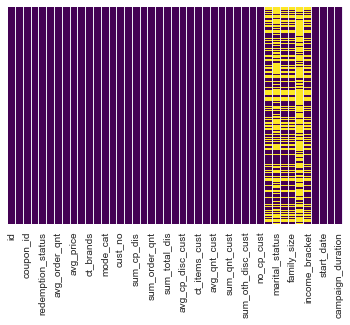

<Figure size 1440x1440 with 0 Axes>

In [127]:
sns.heatmap(train_final.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure(figsize=(20,20))

In [128]:
#for age

In [129]:
train_final.age_range.value_counts()

46-55    15154
36-45    11210
26-35     8024
56-70     3723
70+       3094
18-25     2456
Name: age_range, dtype: int64

In [130]:
34708/78369

0.44287919968354833

44 percentage of values are missing

In [131]:
train_final.fillna({'age_range':'unknown'}, inplace=True)

In [132]:
fillNaN_values ={'age_range':'unknown'}

In [133]:
#for marital_status

In [134]:
train_final.marital_status.value_counts()

Married    18811
Single      6583
Name: marital_status, dtype: int64

In [135]:
train_final.fillna({'marital_status':'unknown'}, inplace=True)

In [136]:
fillNaN_values['marital_status']='unknown'

In [137]:
#Rented

In [138]:
train_final.rented.value_counts()

0.0    41156
1.0     2505
Name: rented, dtype: int64

In [139]:
#Since the majority of values for rented is 0, we fill the missing values with 0.

In [140]:
train_final.fillna({'rented':0}, inplace= True)

In [141]:
fillNaN_values['rented']=0

In [142]:
#for family size

In [143]:
train_final.family_size.value_counts()

2     16888
1     13612
3      6267
5+     3755
4      3139
Name: family_size, dtype: int64

In [144]:
train_final.family_size.unique()

array(['1', '2', nan, '3', '4', '5+'], dtype=object)

In [145]:
train_final.fillna({'family_size':'1'}, inplace=True)

In [146]:
fillNaN_values['family_size']='1'

In [147]:
#for no of children

In [148]:
train_final.no_of_children.unique()

array([nan, '1', '2', '3+'], dtype=object)

In [149]:
train_final.fillna({'no_of_children':'0'},inplace=True)

In [150]:
fillNaN_values['no_of_children']='0'

In [151]:
#for income

In [152]:
train_final.income_bracket.mean()

4.802478184191842

In [153]:
train_final.fillna({'income_bracket':5}, inplace=True)

In [154]:
fillNaN_values['income_bracket']=5

In [155]:
train_final[['marital_status', 'family_size', 'no_of_children','income_bracket','rented','age_range']]

,marital_status,family_size,no_of_children,income_bracket,rented,age_range
0,unknown,1,0,5.0,0.0,46-55
1,Married,2,0,3.0,0.0,36-45
2,Married,2,0,7.0,0.0,46-55
3,unknown,1,0,5.0,0.0,unknown
4,Married,2,0,3.0,0.0,46-55
...,...,...,...,...,...,...
78364,Married,2,0,1.0,0.0,70+
78365,Married,2,0,2.0,0.0,70+
78366,unknown,1,0,5.0,0.0,unknown
78367,Married,5+,3+,4.0,0.0,36-45


In [156]:
test_cp_trans_item.isnull().sum()

id               0
campaign_id      0
coupon_id        0
customer_id      0
avg_cp_dis       0
avg_order_qnt    0
avg_oth_dis      0
avg_price        0
avg_total_dis    0
ct_brands        0
brand_type       0
mode_cat         0
ct_ord           0
cust_no          0
ct_items         0
sum_cp_dis       0
sum_cp_used      0
sum_order_qnt    0
sum_oth_dis      0
sum_total_dis    0
ct_cat           0
dtype: int64

In [157]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78369 non-null  int64         
 1   campaign_id        78369 non-null  int64         
 2   coupon_id          78369 non-null  int64         
 3   customer_id        78369 non-null  int64         
 4   redemption_status  78369 non-null  int64         
 5   avg_cp_dis         78369 non-null  float64       
 6   avg_order_qnt      78369 non-null  float64       
 7   avg_oth_dis        78369 non-null  float64       
 8   avg_price          78369 non-null  float64       
 9   avg_total_dis      78369 non-null  float64       
 10  ct_brands          78369 non-null  float64       
 11  brand_type         78369 non-null  object        
 12  mode_cat           78369 non-null  float64       
 13  ct_ord             78369 non-null  float64       
 14  cust_n

In [158]:
train_final.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
avg_cp_dis           0
avg_order_qnt        0
avg_oth_dis          0
avg_price            0
avg_total_dis        0
ct_brands            0
brand_type           0
mode_cat             0
ct_ord               0
cust_no              0
ct_items             0
sum_cp_dis           0
sum_cp_used          0
sum_order_qnt        0
sum_oth_dis          0
sum_total_dis        0
ct_cat               0
avg_cp_disc_cust     0
avg_cp_use_cust      0
ct_items_cust        0
avg_oth_disc_cust    0
avg_qnt_cust         0
avg_price_cust       0
sum_qnt_cust         0
sum_price_cust       0
sum_oth_disc_cust    0
sum_cp_disc_cust     0
no_cp_cust           0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
campaign_type        0
start_date           0
end_date             0
campaign_duration    0
dtype: int6

In [159]:
finals={}

In [160]:
finals['train_final']= train_final

Creating Dummy variabels

In [161]:
train_final = finals['train_final']

In [162]:
train_final.campaign_type.value_counts()

X    57684
Y    20685
Name: campaign_type, dtype: int64

In [163]:
train_final.brand_type.value_counts()


0.0     59949
1.0     16588
Both     1832
Name: brand_type, dtype: int64

In [164]:
y= train_final.redemption_status

In [165]:
y.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [166]:
finals.keys()

dict_keys(['train_final'])

In [167]:
X_cols = list(set(train_final.columns)-set(['redemption_status','start_date','end_date']))
X=train_final[X_cols]

In [168]:
X1=X[['age_range','marital_status']]

In [169]:
X1=pd.get_dummies(X1)

In [170]:
X1.columns

Index(['age_range_18-25', 'age_range_26-35', 'age_range_36-45',
       'age_range_46-55', 'age_range_56-70', 'age_range_70+',
       'age_range_unknown', 'marital_status_Married', 'marital_status_Single',
       'marital_status_unknown'],
      dtype='object')

In [171]:
for col in X1.columns:
    if 'unknown' in col:
        X1.drop(col,axis=1,inplace=True)

In [172]:
X.drop(['age_range','marital_status'], axis=1, inplace = True)

/home/hardik/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [173]:
X = pd.get_dummies(X, drop_first=True)

In [174]:
X.head()

,ct_ord,sum_order_qnt,ct_items,mode_cat,sum_oth_disc_cust,no_cp_cust,sum_cp_disc_cust,ct_cat,avg_cp_disc_cust,campaign_duration,...,family_size_2,family_size_3,family_size_4,family_size_5+,brand_type_1.0,brand_type_Both,no_of_children_1,no_of_children_2,no_of_children_3+,campaign_type_Y
0,3713.0,4661.0,125,6.0,-10282.37,1.0,-89.05,1.0,-0.287258,47,...,0,0,0,0,0,0,0,0,0,0
1,75.0,86.0,3,6.0,-10664.18,12.0,-1237.79,1.0,-3.215039,47,...,1,0,0,0,1,0,0,0,0,0
2,142.0,202.0,67,11.0,-17261.79,85.0,-2145.72,1.0,-2.212082,32,...,1,0,0,0,0,0,0,0,0,1
3,39.0,47.0,4,6.0,-3947.37,2.0,-178.10,1.0,-0.751477,47,...,0,0,0,0,0,0,0,0,0,0
4,1420.0,1610.0,32,6.0,-11534.90,10.0,-265.01,1.0,-0.471548,48,...,1,0,0,0,0,0,0,0,0,0


In [175]:
X = X.join(X1)

In [176]:
X

,ct_ord,sum_order_qnt,ct_items,mode_cat,sum_oth_disc_cust,no_cp_cust,sum_cp_disc_cust,ct_cat,avg_cp_disc_cust,campaign_duration,...,no_of_children_3+,campaign_type_Y,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single
0,3713.0,4661.0,125,6.0,-10282.37,1.0,-89.05,1.0,-0.287258,47,...,0,0,0,0,0,1,0,0,0,0
1,75.0,86.0,3,6.0,-10664.18,12.0,-1237.79,1.0,-3.215039,47,...,0,0,0,0,1,0,0,0,1,0
2,142.0,202.0,67,11.0,-17261.79,85.0,-2145.72,1.0,-2.212082,32,...,0,1,0,0,0,1,0,0,1,0
3,39.0,47.0,4,6.0,-3947.37,2.0,-178.10,1.0,-0.751477,47,...,0,0,0,0,0,0,0,0,0,0
4,1420.0,1610.0,32,6.0,-11534.90,10.0,-265.01,1.0,-0.471548,48,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,332.0,403.0,4,6.0,-4186.34,0.0,0.00,1.0,0.000000,48,...,0,0,0,0,0,0,0,1,1,0
78365,530.0,611.0,7,6.0,-4031.81,1.0,-89.05,1.0,-0.346498,46,...,0,0,0,0,0,0,0,1,1,0
78366,1893.0,1985.0,83,6.0,-26712.95,6.0,-260.03,1.0,-0.143267,48,...,0,0,0,0,0,0,0,0,0,0
78367,436.0,452.0,7,6.0,-21222.86,50.0,-1325.04,1.0,-1.412623,47,...,1,0,0,0,1,0,0,0,1,0


In [177]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ct_ord                  78369 non-null  float64
 1   sum_order_qnt           78369 non-null  float64
 2   ct_items                78369 non-null  int64  
 3   mode_cat                78369 non-null  float64
 4   sum_oth_disc_cust       78369 non-null  float64
 5   no_cp_cust              78369 non-null  float64
 6   sum_cp_disc_cust        78369 non-null  float64
 7   ct_cat                  78369 non-null  float64
 8   avg_cp_disc_cust        78369 non-null  float64
 9   campaign_duration       78369 non-null  int64  
 10  income_bracket          78369 non-null  float64
 11  avg_order_qnt           78369 non-null  float64
 12  ct_brands               78369 non-null  float64
 13  customer_id             78369 non-null  int64  
 14  coupon_id               78369 non-null

In [178]:
finals['X'] = X

In [179]:
finals['y'] = y

In [180]:
X

,ct_ord,sum_order_qnt,ct_items,mode_cat,sum_oth_disc_cust,no_cp_cust,sum_cp_disc_cust,ct_cat,avg_cp_disc_cust,campaign_duration,...,no_of_children_3+,campaign_type_Y,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single
0,3713.0,4661.0,125,6.0,-10282.37,1.0,-89.05,1.0,-0.287258,47,...,0,0,0,0,0,1,0,0,0,0
1,75.0,86.0,3,6.0,-10664.18,12.0,-1237.79,1.0,-3.215039,47,...,0,0,0,0,1,0,0,0,1,0
2,142.0,202.0,67,11.0,-17261.79,85.0,-2145.72,1.0,-2.212082,32,...,0,1,0,0,0,1,0,0,1,0
3,39.0,47.0,4,6.0,-3947.37,2.0,-178.10,1.0,-0.751477,47,...,0,0,0,0,0,0,0,0,0,0
4,1420.0,1610.0,32,6.0,-11534.90,10.0,-265.01,1.0,-0.471548,48,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,332.0,403.0,4,6.0,-4186.34,0.0,0.00,1.0,0.000000,48,...,0,0,0,0,0,0,0,1,1,0
78365,530.0,611.0,7,6.0,-4031.81,1.0,-89.05,1.0,-0.346498,46,...,0,0,0,0,0,0,0,1,1,0
78366,1893.0,1985.0,83,6.0,-26712.95,6.0,-260.03,1.0,-0.143267,48,...,0,0,0,0,0,0,0,0,0,0
78367,436.0,452.0,7,6.0,-21222.86,50.0,-1325.04,1.0,-1.412623,47,...,1,0,0,0,1,0,0,0,1,0


In [181]:
y

0        0
1        0
2        0
3        0
4        0
        ..
78364    0
78365    0
78366    0
78367    0
78368    0
Name: redemption_status, Length: 78369, dtype: int64

In [182]:
y.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

# Training And Testing of Data

training set—a subset to train a model.


test set—a subset to test the trained model.

In [183]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Number  X_train dataset: ", X_train.shape) 
print("Number  y_train dataset: ", y_train.shape) 
print("Number  X_test dataset: ", X_test.shape) 
print("Number  y_test dataset: ", y_test.shape)

Number  X_train dataset:  (54858, 52)
Number  y_train dataset:  (54858,)
Number  X_test dataset:  (23511, 52)
Number  y_test dataset:  (23511,)


In [184]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
# logistic regression object
lr = LogisticRegression()
lr = LogisticRegression(max_iter=100000, solver='sag')
# train the model on train set 
lr.fit(X_train, y_train) 
predictions = lr.predict(X_test)   
# print classification report 
results=confusion_matrix(y_test,predictions)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,predictions) )
print ('Report : ')
print (classification_report(y_test,predictions))

Confusion Matrix :
[[23292    12]
 [  206     1]]
Accuracy Score : 0.99072774446004
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23304
           1       0.08      0.00      0.01       207

    accuracy                           0.99     23511
   macro avg       0.53      0.50      0.50     23511
weighted avg       0.98      0.99      0.99     23511



The accuracy comes out to be 99% but did you notice something strange ?
The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

We can see that all the data is imbalanced so we will use SMOTE mathod Which will create artificial data

# Over-sampling using SMOTE

In [185]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of X_train: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape)) 

sm = SMOTE(random_state = 2) 
X_test, y_test = sm.fit_sample(X_test, y_test) 

print('After OverSampling, the shape of X_test: {}'.format(X_test.shape)) 
print('After OverSampling, the shape of y_test: {} \n'.format(y_test.shape)) 

Before OverSampling, counts of label '1': 522
Before OverSampling, counts of label '0': 54336 

After OverSampling, the shape of X_train: (108672, 52)
After OverSampling, the shape of y_train: (108672,) 

After OverSampling, the shape of X_test: (46608, 52)
After OverSampling, the shape of y_test: (46608,) 



In [186]:
print("Before OverSampling, counts of label train'1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label train'0': {} \n".format(sum(y_train == 0))) 
print("Before OverSampling, counts of label test '1': {}".format(sum(y_test == 1))) 
print("Before OverSampling, counts of label test '0': {} \n".format(sum(y_test == 0)))

Before OverSampling, counts of label train'1': 54336
Before OverSampling, counts of label train'0': 54336 

Before OverSampling, counts of label test '1': 23304
Before OverSampling, counts of label test '0': 23304 



In [187]:
y_train.value_counts()

1    54336
0    54336
Name: redemption_status, dtype: int64

In [188]:
y_test.value_counts()

1    23304
0    23304
Name: redemption_status, dtype: int64

In [189]:
# logistic regression object
lr2 = LogisticRegression()
lr2 = LogisticRegression(max_iter=100000)
# train the model on train set 
lr2.fit(X_train, y_train) 
predictions = lr2.predict(X_test)   
# print classification report 
results=confusion_matrix(y_test,predictions)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,predictions) )
print ('Report : ')
print (classification_report(y_test,predictions))

Confusion Matrix :
[[19706  3598]
 [ 6267 17037]]
Accuracy Score : 0.7883410573292139
Report : 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80     23304
           1       0.83      0.73      0.78     23304

    accuracy                           0.79     46608
   macro avg       0.79      0.79      0.79     46608
weighted avg       0.79      0.79      0.79     46608



# Near miss Algorithm


This is for undersample of data

In [190]:
#print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
#print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
#from imblearn.under_sampling import NearMiss 
#nr = NearMiss() 
  
#X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
#print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
#print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
#print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
#print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

If you need this you can uncomment this algorithm

# Model Building 

Recall – What percent of the positive cases did you catch? 

F1 score – What percent of positive predictions were correct? 

Precision – What percent of your predictions were correct?

# Logistic regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [191]:
# logistic regression object
logmodel = LogisticRegression()
logmodel = LogisticRegression(max_iter=100000)
# train the model on train set 
logmodel.fit(X_train, y_train) 
predictions = logmodel.predict(X_test)   
# print classification report 
results=confusion_matrix(y_test,predictions)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,predictions) )
print ('Report : ')
print (classification_report(y_test,predictions))

Confusion Matrix :
[[19706  3598]
 [ 6267 17037]]
Accuracy Score : 0.7883410573292139
Report : 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80     23304
           1       0.83      0.73      0.78     23304

    accuracy                           0.79     46608
   macro avg       0.79      0.79      0.79     46608
weighted avg       0.79      0.79      0.79     46608



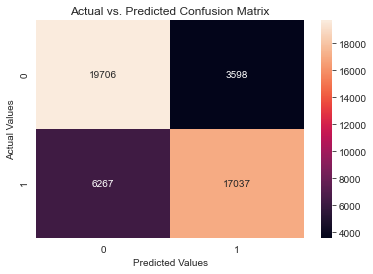

In [192]:
conf_mat = confusion_matrix(y_test,predictions)
sns.heatmap(conf_mat,annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [193]:
TN=conf_mat[0,0]
TP=conf_mat[1,1]
FN=conf_mat[1,0]
FP=conf_mat[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [194]:
print( 'The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

      'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

      'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

      'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

      'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

      'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

      'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

      'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7883410573292139 
 The Missclassification = 1-Accuracy =  0.2116589426707861 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.731076210092688 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8456059045657398 
 Positive Predictive value = TP/(TP+FP) =  0.8256360552459414 
 Negative predictive Value = TN/(TN+FN) =  0.7587109690832788 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.735130628126738 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3180249670151223


In [195]:
#Get predicted probabilites
target_probailities_log = logmodel.predict_proba(X_test)[:,1]

In [196]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_log)

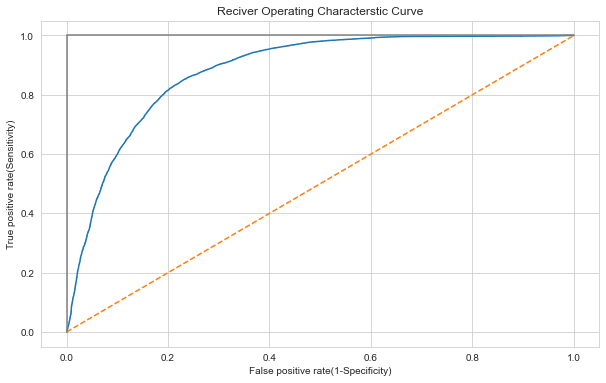

In [197]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate(Sensitivity)')
plt.xlabel('False positive rate(1-Specificity)')
plt.show()

In [198]:
print ('Accuracy Score :',accuracy_score(y_test,predictions) )

Accuracy Score : 0.7883410573292139


# Naive Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);
predict = model.predict(X_test)

In [200]:
# print classification report 
results=confusion_matrix(y_test,predict)
print ('Confusion Matrix :')
print(results) 
print ('Report : ')
print (classification_report(y_test,predict))

Confusion Matrix :
[[22426   878]
 [18174  5130]]
Report : 
              precision    recall  f1-score   support

           0       0.55      0.96      0.70     23304
           1       0.85      0.22      0.35     23304

    accuracy                           0.59     46608
   macro avg       0.70      0.59      0.53     46608
weighted avg       0.70      0.59      0.53     46608



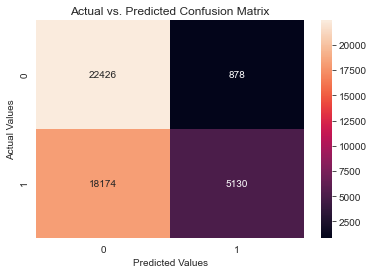

In [201]:
conf_mat = confusion_matrix(y_test,predict)
sns.heatmap(conf_mat,annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [202]:
print ('Accuracy Score :',accuracy_score(y_test,predict) )

Accuracy Score : 0.5912289735667696


# K-Nearest Neighbours

In [203]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [204]:
# print classification report 
results=confusion_matrix(y_test,y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Report : ')
print (classification_report(y_test,y_pred))

Confusion Matrix :
[[21663  1641]
 [14591  8713]]
Report : 
              precision    recall  f1-score   support

           0       0.60      0.93      0.73     23304
           1       0.84      0.37      0.52     23304

    accuracy                           0.65     46608
   macro avg       0.72      0.65      0.62     46608
weighted avg       0.72      0.65      0.62     46608



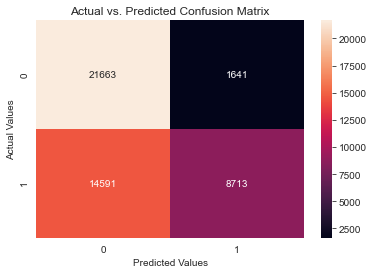

In [205]:
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [206]:
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.651733607964298


# Decision Tree 

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_predicts = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predicts))

Accuracy: 0.9124613800205973


In [208]:
# print classification report 
results=confusion_matrix(y_test,y_predicts)
print ('Confusion Matrix :')
print(results) 
print ('Report : ')
print (classification_report(y_test,y_predicts))

Confusion Matrix :
[[22986   318]
 [ 3762 19542]]
Report : 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     23304
           1       0.98      0.84      0.91     23304

    accuracy                           0.91     46608
   macro avg       0.92      0.91      0.91     46608
weighted avg       0.92      0.91      0.91     46608



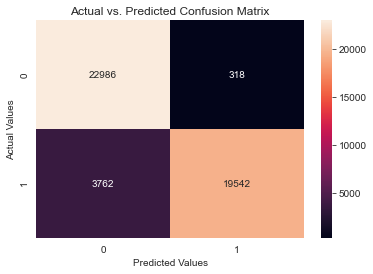

In [209]:
conf_mat = confusion_matrix(y_test,y_predicts)
sns.heatmap(conf_mat,annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [210]:
print ('Accuracy Score :',accuracy_score(y_test,y_predicts))

Accuracy Score : 0.9124613800205973


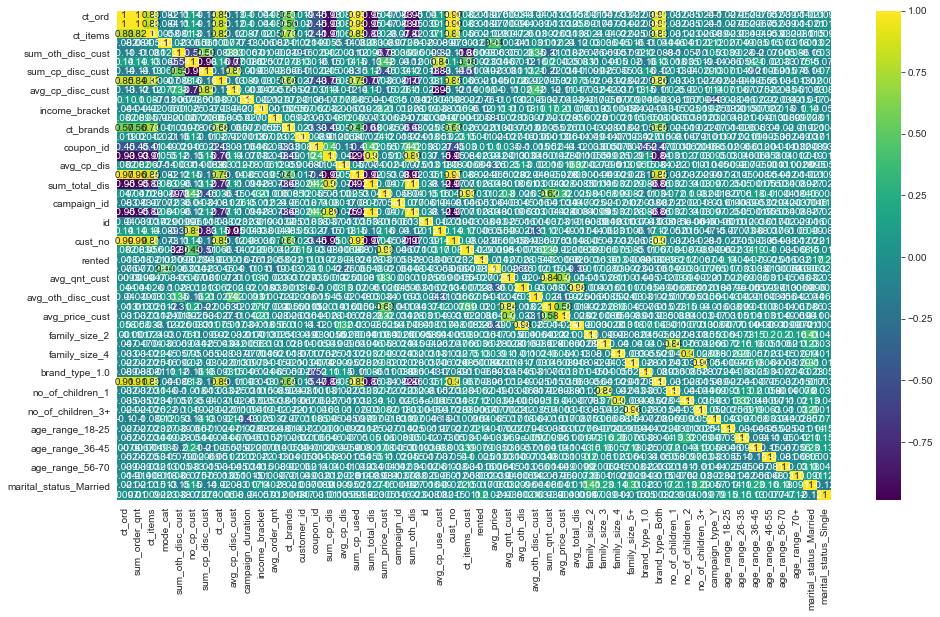

In [213]:
plt.figure(figsize=(16,9))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')
plt.show()

[Text(226.723489450079, 431.37290322580645, 'X[5] <= 11.001\ngini = 0.5\nsamples = 108672\nvalue = [54336, 54336]'),
 Text(88.57015405823837, 424.35870967741937, 'X[5] <= 7.0\ngini = 0.155\nsamples = 40659\nvalue = [37220, 3439]'),
 Text(40.90297166768781, 417.34451612903223, 'X[5] <= 5.003\ngini = 0.05\nsamples = 33140\nvalue = [32296, 844]'),
 Text(14.446078432923267, 410.33032258064515, 'X[17] <= 15.008\ngini = 0.015\nsamples = 28676\nvalue = [28456, 220]'),
 Text(4.917813934612176, 403.31612903225806, 'X[17] <= 14.44\ngini = 0.001\nsamples = 19837\nvalue = [19832, 5]'),
 Text(3.026347036684416, 396.301935483871, 'X[15] <= -1335.035\ngini = 0.0\nsamples = 19251\nvalue = [19249, 2]'),
 Text(1.513173518342208, 389.2877419354839, 'X[23] <= 0.009\ngini = 0.016\nsamples = 128\nvalue = [127, 1]'),
 Text(0.756586759171104, 382.27354838709675, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(2.2697602775133117, 382.27354838709675, 'X[29] <= -42.088\ngini = 0.219\nsamples = 8\nvalue = [

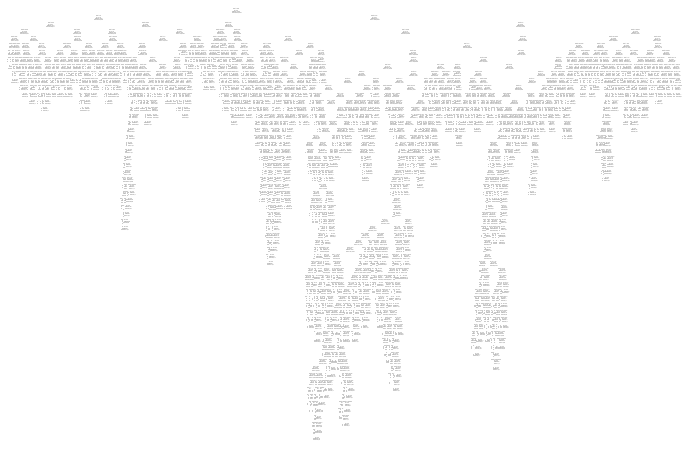

In [215]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) 